ISLR Chapter 2 Lab and Assignment
----
- Author: Carson Hanel
- Class : Data Mining in Social Networks
- Prof  : Eduardo Nakamura

Some basic commands
----
This is all very introductory R, but it's necessary to do it this way. This is the first R programming material to appear on my GitHub repository, so I'd like it to be very elementary (and honestly, mostly from the textbook) as a living reference/blog for my future endeavors in both data science and statistical learning

1.1 List Comprehension:
----

In [33]:
# Comparison of assignment operators; They'll both do.
x <- c(1,6,2)
y = c(1,4,3)
print(x)
print(y)

[1] 1 6 2
[1] 1 4 3


In [34]:
# Some insightful commands in R
sprintf("Length of x: %d",length(x))
sprintf("Length of y: %d",length(y))

# Neat to note, when given an iterative sprintf, outputs message for all elements.
# This would be useful for outputting matrices/elements after some operation.
sprintf("Element-wise sum: %d",x+y)
print(x+y)

[1] "Length of x: 3"

[1] "Length of y: 3"

[1] "Element-wise sum: 2"  "Element-wise sum: 10" "Element-wise sum: 5"

[1]  2 10  5


In [35]:
# Listing all current variables (useful in R CMD prompt)
print("Printing all elements:")
ls()

# Removing x and y from the variable table
print("Deleting x, y.")
rm(x, y)

# Re-listing variables after deletion
print("Second call to ls()")
ls()
print("Notice, no variables printed, and a white space above.")

# Before the next example, I'll add some variables.
x = c(8,6,7,5,3,0,9)
y = c("This", "is", "R", "programming")
print("Printing new elements:")
ls()

# Deleting all variables at once:
rm(list=ls())
print("After the rm(list=ls()) call:")
ls()

[1] "Printing all elements:"


[1] "x" "y"

[1] "Deleting x, y."
[1] "Second call to ls()"


character(0)

[1] "Notice, no variables printed, and a white space above."
[1] "Printing new elements:"


[1] "x" "y"

[1] "After the rm(list=ls()) call:"


character(0)

1.2 Matrix Comprehension and Experimentation:
----
In order to learn more about matrix() and how it can be utilized, first we'll do this:

In [36]:
# Gaining R-Insight on library functions
# Running this command will open up a browser box with Matrix information;
# This is unable to be shown in the Jupyter Notebook.
?matrix

Initially, I'd like to create a basic matrix holding basic data:

In [37]:
# Now, we'll create a 2x2 matrix with data:
x = matrix(data=c(1,2,3,4), nrow = 2, ncol = 2)
x

1,3
2,4


Notice that the matrix was filled in column-wise. Sometimes, that'll be absolutely perfect, for example, a scalar vector with sized chunks that represent the data of employees for a company; perhaps a column is representative of the certain employee's metrics, and filling in the matrix column-wise would be appropriately lining up the employee data.

Other times, we'll want to fill in a matrix by the row. In order to do this, you utilize the extra argument "byrow = TRUE".

In [39]:
# In order to fill a matrix in row-wise:
x = matrix(data=c(1,2,3,4), nrow = 2, ncol = 2, byrow = TRUE)
x

1,2
3,4


Additionally, commands can be applied, or mapped, to entire matrices or instances of data like so:

In [43]:
# Applying functions to all elements in x and storing in new variables
root   = sqrt(x)
square = x^2

print("Root of x:")
print(root)

print("Square of x:")
print(square)

print("Sqare of root:")
print(root^2)


[1] "Root of x:"
         [,1]     [,2]
[1,] 1.000000 1.414214
[2,] 1.732051 2.000000
[1] "Square of x:"
     [,1] [,2]
[1,]    1    4
[2,]    9   16
[1] "Sqare of root:"
     [,1] [,2]
[1,]    1    2
[2,]    3    4


Sometimes, you'll want to generate a matrix of random normalized values centered around some $\mu$ with some $\sigma$.
This has significant value in the field of statistics and allows the user flexibility in generating statistical simulations.

In order to do this, you can use rnorm().

To expand, cor(x,y) gives the pointwise correlation between two variables and is calculated like so:

In [44]:
# Create a list of 50 random normal values
x = rnorm(50)
# Create a second list with mean 50 and a low standard deviation
y = x + rnorm(50, mean=50, sd=.1)

# Calculate the correlation between the two
cor(x,y)

[1] 0.9956777

In randomized experiments, sometimes you'd like your results to be reproducible.

In order to facilitate this, utilize a seed:

In [45]:
# Set a random seed that'll be utilize to calculate random values
set.seed(1337)
rnorm(50)

[1]  0.19249191 -1.44670181 -0.32318053  1.62229612 -0.68902412  2.04212222
 [7]  0.94377911  2.08192688  1.91711728 -0.41481224  1.03285350 -1.67856959
[13]  0.15754969  1.48913612 -0.07578956  1.27178094  0.64167341  0.80076125
[19]  1.86265923 -0.54535603  0.61927781  0.12264043 -0.79098417 -0.49977167
[25] -1.63515201  1.78456732  0.29887827  0.75250489 -1.07460214  0.06427374
[31]  1.26264948  1.09994930 -1.12355513  3.44607885 -0.71972217 -0.32685410
[37] -0.52977397  0.52415274 -1.07960965 -0.05511102  2.19868418 -1.77390933
[43]  0.06503223  0.65497038 -0.71286911  1.02056754  0.63161472  0.44743335
[49]  0.46653706 -0.69826061

In [48]:
# To put it all together, we'll place these values into a matrix, row-wise
# For fun, I'll make a matrix of values of mean 75, standard deviation 10 which is approximately
# the normal dispersion of test grades for collegiate classes, or so it seems.
random = matrix(c(rnorm(100, mean = 75, sd=10)), nrow = 10, ncol = 10, byrow = TRUE)
random

59.67445,83.97332,52.85078,79.90129,80.42956,76.23412,76.04651,79.40673,77.55793,69.81803
76.59107,78.61524,51.20495,82.58486,81.17615,75.20116,74.66694,63.92427,61.69106,80.64862
60.92586,62.40751,74.08499,61.77540,85.90198,70.93898,73.78725,75.64277,52.49051,81.37189
70.20534,65.49231,82.76774,86.11507,74.45265,68.72934,64.91610,67.59462,80.45355,109.06387
80.43828,75.61612,68.45672,67.60039,76.27343,71.70047,87.77831,61.55147,79.59774,80.73785
82.14742,69.59994,66.63856,93.98094,75.79433,61.55574,91.13705,81.73798,89.25316,71.45269
70.99496,73.42483,71.72035,64.69240,81.86373,83.15567,90.94794,61.84187,82.14647,81.52115
78.00970,72.40110,87.05367,71.11177,69.45600,79.44937,58.03339,67.90258,69.49827,73.06346
80.82816,57.99993,77.88193,70.85645,92.18308,69.04382,76.04349,86.20910,68.30096,65.50398
70.68764,62.35609,93.50786,77.51739,61.51584,84.45854,66.19442,80.57068,76.83054,65.84691


Now that we've got a simulated dataset of student's average grades, and it's in a neat matrix format, we'll do some basic analysis using R.

In [57]:
# Some basic R commands on our simulated data
# Mean:
mean(random)

# Variance: Not entirely sure what's happening with the matrix
var(random)

# Standard Deviation:
sd(random)

# Clean Variance:
sd(random)^2

[1] 74.36989

64.309267,-9.3417060,13.534124,19.082964,-4.5379291,-17.64099,20.157735,-6.342267,26.809888,-16.6634879
-9.341706,66.5235440,-81.090947,13.296815,-4.7560502,11.61255,22.065682,-35.367668,18.609110,0.4552384
13.534124,-81.0909474,186.754449,-29.409018,-57.3973696,24.32724,-78.336664,19.578975,7.724356,6.5482138
19.082964,13.2968145,-29.409018,104.013778,-27.0339972,-31.80156,-1.385167,24.386836,54.885755,15.6465708
-4.537929,-4.7560502,-57.397370,-27.033997,73.2873907,-24.29598,37.495702,9.992911,-36.042007,-0.7233915
-17.640995,11.6125453,24.327235,-31.801563,-24.2959820,50.13067,-23.950363,-19.406261,-7.743390,-19.3060437
20.157735,22.0656819,-78.336664,-1.385167,37.4957021,-23.95036,126.639782,-9.460665,51.556815,-18.0703313
-6.342267,-35.3676684,19.578975,24.386836,9.9929109,-19.40626,-9.460665,83.112546,-1.179571,-66.1732250
26.809888,18.6091097,7.724356,54.885755,-36.0420075,-7.74339,51.556815,-1.179571,117.679495,7.6891496
-16.663488,0.4552384,6.548214,15.646571,-0.7233915,-19.30604,-18.070331,-66.173225,7.689150,160.1309385


[1] 9.97019

[1] 99.40469

1.3 Graphics:
----


In [80]:
# Optional R notes command:
?plot

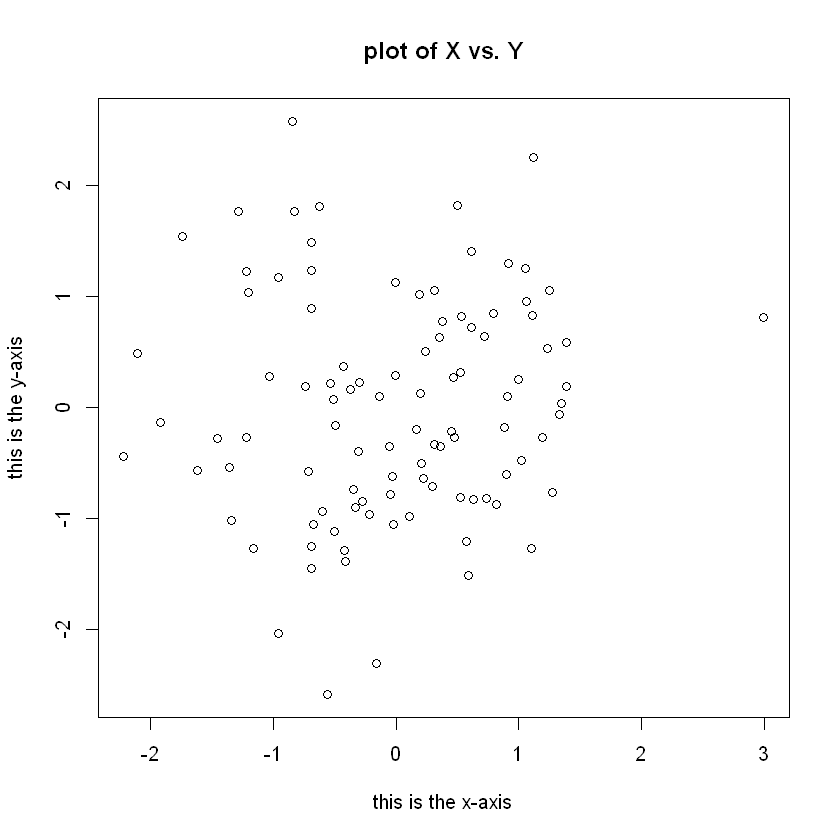

In [78]:
x = rnorm(100)
y = rnorm(100)
plot(x,y, xlab = "this is the x-axis", ylab = "this is the y-axis", main = "plot of X vs. Y")

In order to save this generated plot as a PDF, or a JPEG:

In [81]:
# Creation of a PDF
# Tell the console you want to generate a PDF:
pdf("Figure.pdf")

# Generate the required plot for the PDF:
plot(x,y,col="green")

# Tell the console you're done plotting, and to generate PDF:
dev.off()

png 
  2

Sequential list generation:

Rather than simply plot two random normalized sets against eachother, we can generate sequential lists in R:

In [83]:
# Sequential list generation command
# Essentially "Start from 1 and count to 10, increasing by 1 each time."
x = seq(1,10,1)
print(x)

# Shorthand for seq(1,10,1)
x = 1:10
print(x)

# Let R figure out the intervolic relationship
x = seq(-pi, pi, length=50)
print(x)

 [1]  1  2  3  4  5  6  7  8  9 10
 [1]  1  2  3  4  5  6  7  8  9 10
 [1] -3.14159265 -3.01336438 -2.88513611 -2.75690784 -2.62867957 -2.50045130
 [7] -2.37222302 -2.24399475 -2.11576648 -1.98753821 -1.85930994 -1.73108167
[13] -1.60285339 -1.47462512 -1.34639685 -1.21816858 -1.08994031 -0.96171204
[19] -0.83348377 -0.70525549 -0.57702722 -0.44879895 -0.32057068 -0.19234241
[25] -0.06411414  0.06411414  0.19234241  0.32057068  0.44879895  0.57702722
[31]  0.70525549  0.83348377  0.96171204  1.08994031  1.21816858  1.34639685
[37]  1.47462512  1.60285339  1.73108167  1.85930994  1.98753821  2.11576648
[43]  2.24399475  2.37222302  2.50045130  2.62867957  2.75690784  2.88513611
[49]  3.01336438  3.14159265


Next, we'll see how to create a three dimensional contour plot:

- The first dimension is a vector of X values
- The second dimension is a vector of Y values
- The third dimension is a matrix that coordinates with the (x,y) tuple's Z value

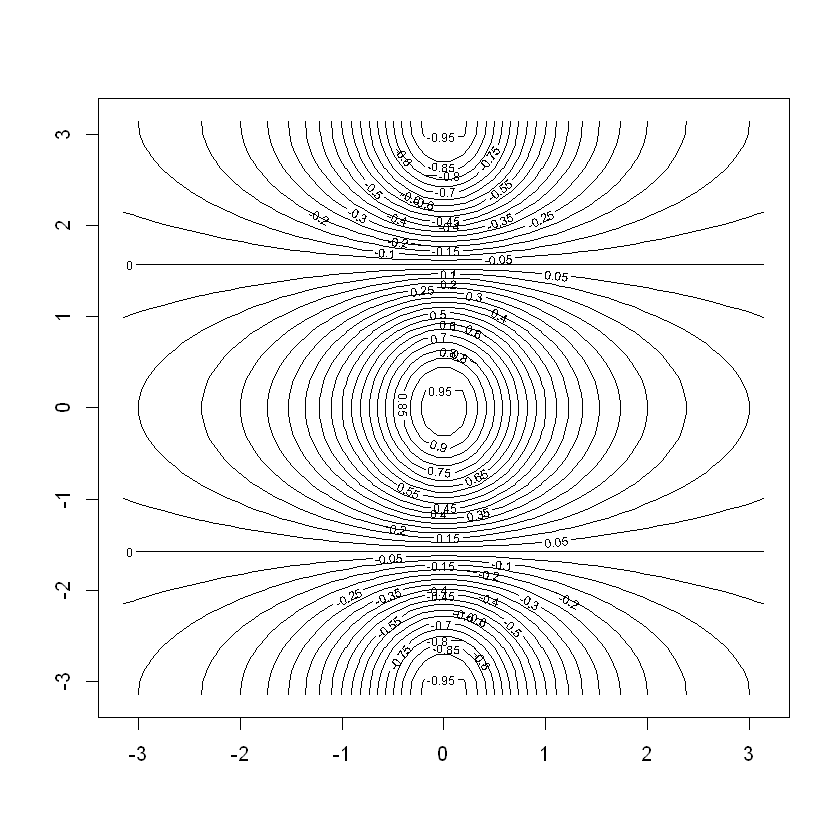

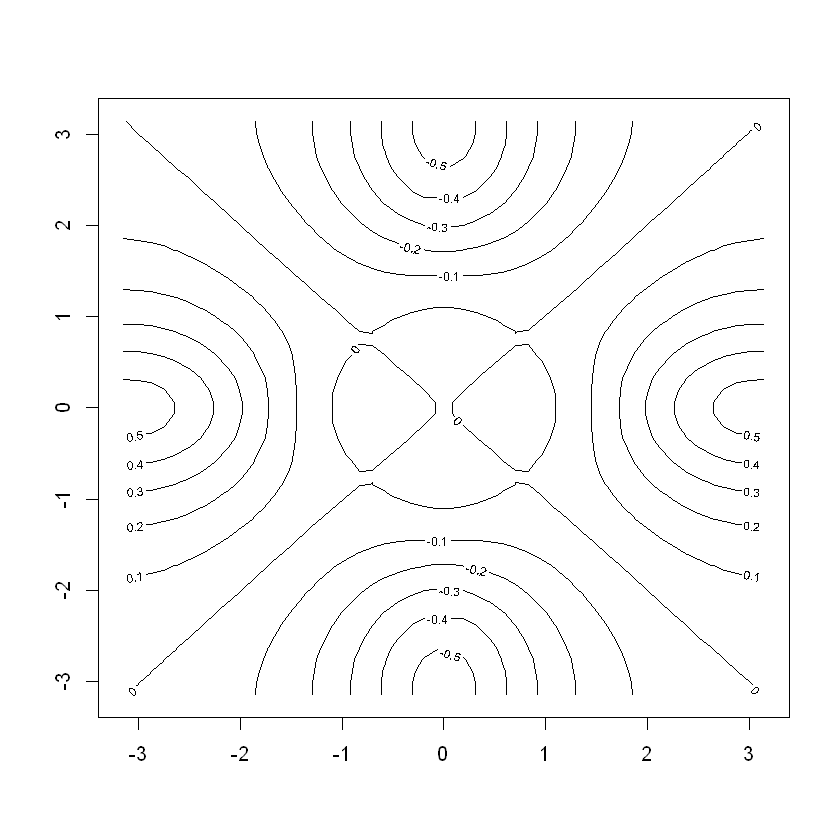

In [86]:
# Generation of variables
y = x
f = outer(x, y, function(x,y)cos(y)/(1 + x^2))

# Simple contour
contour(x, y, f)
    
# More specified contour (seen)
contour(x, y, f, nlevels=45, add=T)
    
# Contour. Not entirely sure what's going on here, but the graphs are beautiful.
# This is the second pictured graph.
fa = (f-t(f))/2
contour(x, y, fa, nlevels=15)

Now, to do this, but with a heat-map (colors) we can use image(x,y,z).

At the same time, persp(x,y,z) allows you to view the graph from different angles:

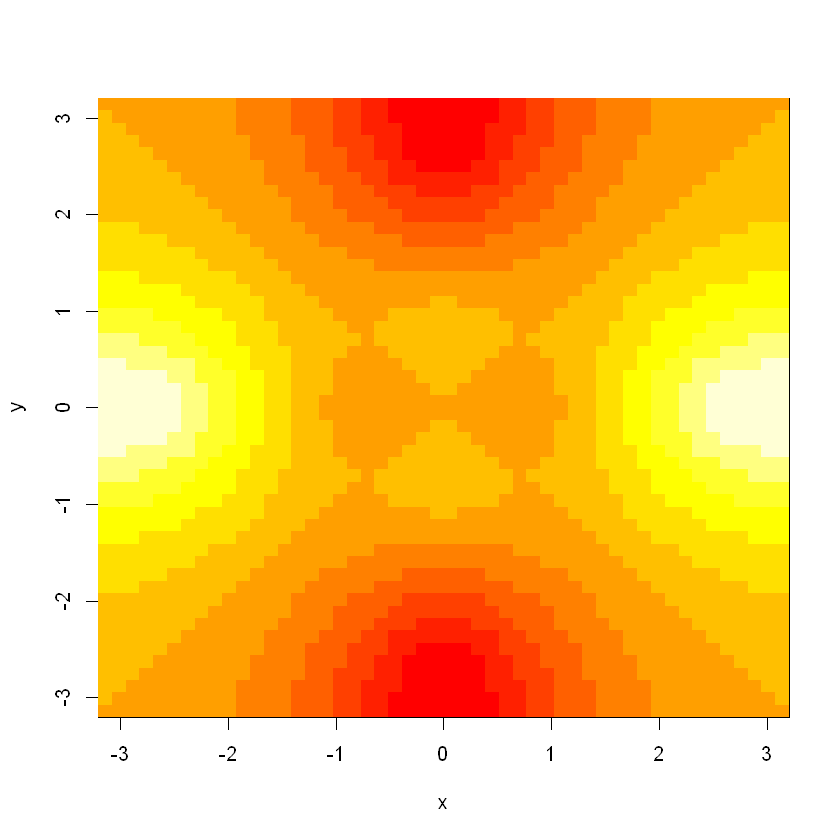

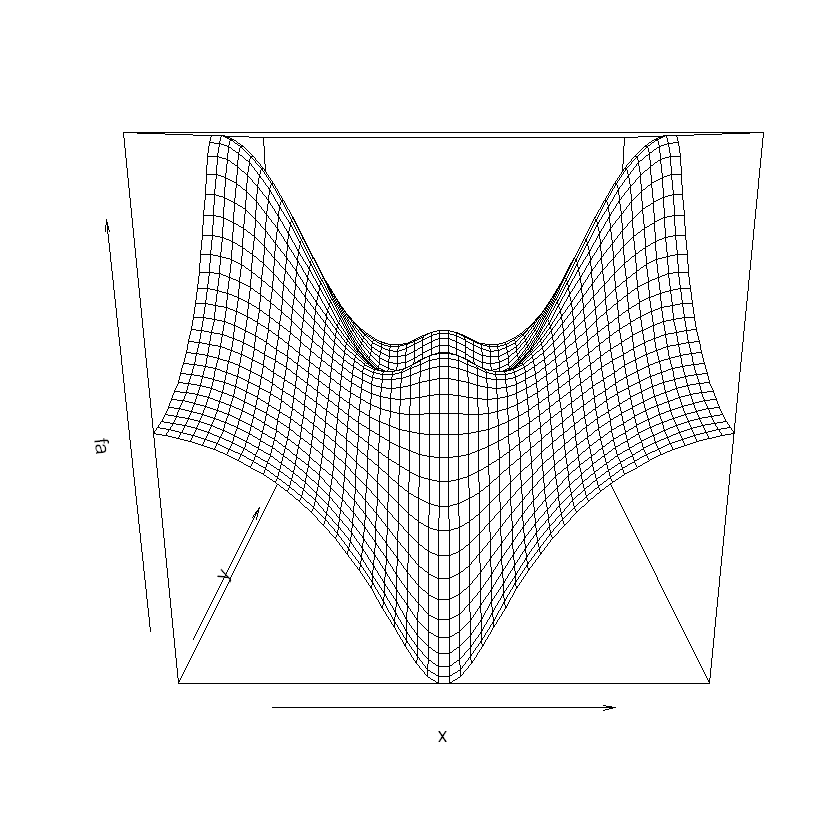

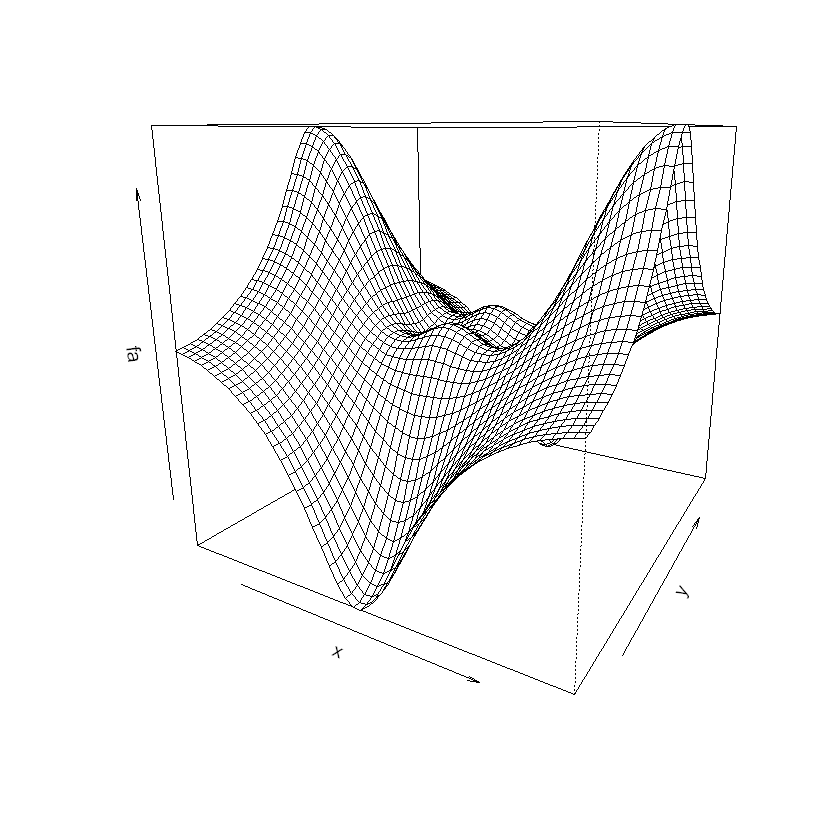

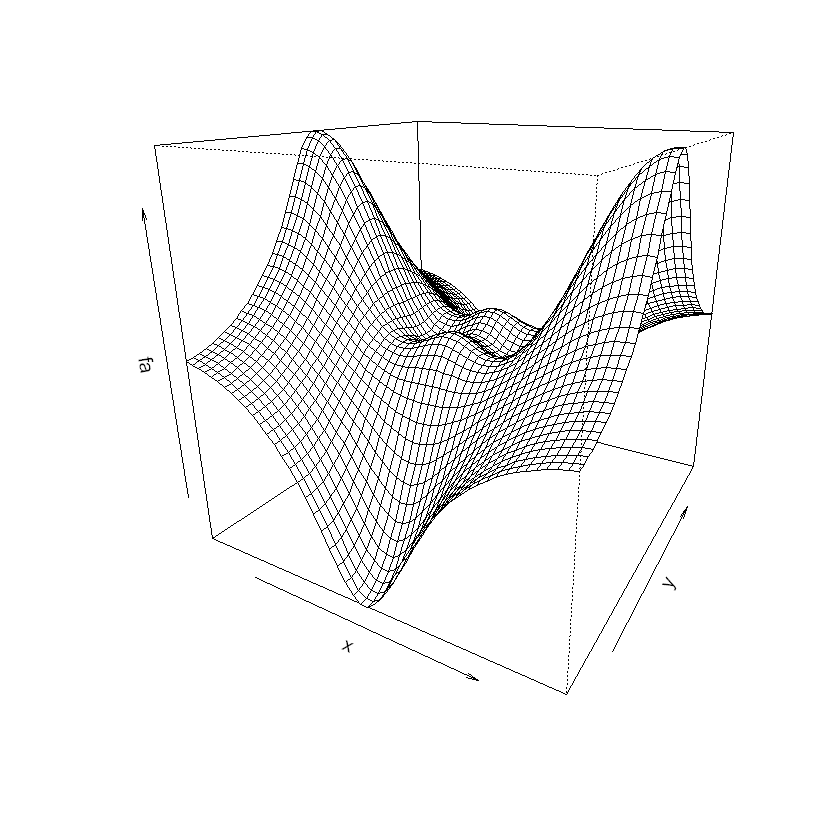

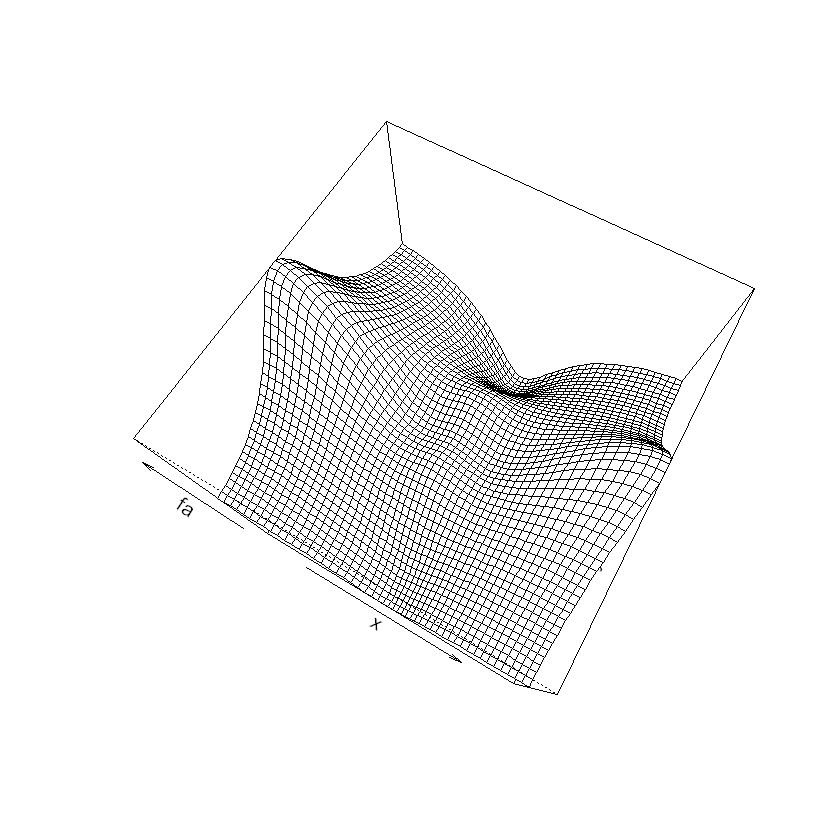

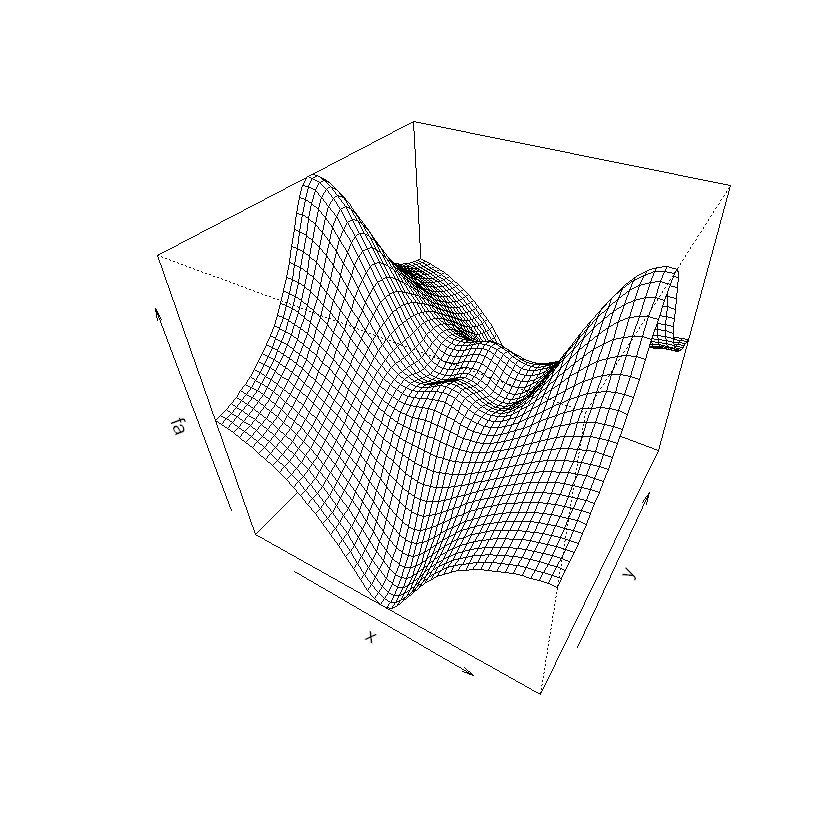

In [92]:
# Heat Map
image(x,y,fa)

# Angle-changed graph
persp(x,y,fa)
persp(x,y,fa,theta=30)

# Notice, as you increase phi, you're getting more of a "bird's eye" view of the object.
# Conversely, as you increase theta, you're rotating the graph
persp(x,y,fa,theta=30,phi=20)
persp(x,y,fa,theta=30,phi=70)
persp(x,y,fa,theta=30,phi=40)

1.4 Indexing Data in R:
----